In [ ]:
#importing pandas library for data handling and manipulation
import pandas as pd 
#importing numpy for scientific calculation 
import numpy as np #for log tranformation, log squared transformation or box cox tranformation (these are three method to solve when there is skewness or kutorsis in our dataset )
#importing pyplot module from matplotlib for data visualization including seaborn as sns 
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('https://raw.githubusercontent.com/omgo101/data-mining-and-skewness-removal/main/california_housing_test.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [ ]:
coordinates=data['latitude'],data['longitude'] #storing coordinates in variables 
type(coordinates) # finding out types

tuple

In [ ]:
x=pd.DataFrame(coordinates).T #its chnages the rows to column

In [ ]:
x.sort_values('latitude') #sorting values 

,latitude,longitude
1208,32.56,-117.09
2371,32.57,-117.08
1617,32.57,-117.12
1045,32.57,-117.11
274,32.58,-117.05
...,...,...
2018,41.31,-122.32
2778,41.54,-123.92
2951,41.63,-122.64
1422,41.80,-124.17


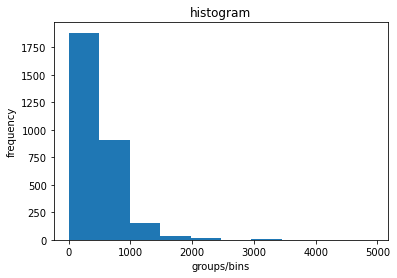

In [ ]:
#ploting an histogram  
plt.hist(data['households'])
plt.savefig('hist.pdf')
plt.title("histogram")
plt.xlabel("groups/bins")
plt.ylabel('frequency')
plt.show()

**identifying and removing skewness** <br>
why we should remove skewness 
because if we dont do so the machine will make baised decision


In [ ]:
#calculating skewness for each column
for i,j in enumerate(data.columns): #to keep a count of iterations that time we use enumerate
  print(j)
  print(data[j].skew())
  for x in range(2):
    print("--------------------")

longitude
-0.29785763262779996
--------------------
--------------------
latitude
0.45981593679052085
--------------------
--------------------
housing_median_age
0.018513121159991593
--------------------
--------------------
total_rooms
4.167637358501556
--------------------
--------------------
total_bedrooms
3.8633931890458686
--------------------
--------------------
population
2.9496706908288868
--------------------
--------------------
households
3.5597534116462914
--------------------
--------------------
median_income
1.6985117348319874
--------------------
--------------------
median_house_value
0.9895619132015638
--------------------
--------------------


In [ ]:
#performing log tranformation on households column
x=np.log(data['households'])
x

0       6.406880
1       5.624018
2       6.204558
3       2.397895
4       5.468060
          ...   
2995    6.408529
2996    6.943122
2997    5.393628
2998    2.639057
2999    5.560682
Name: households, Length: 3000, dtype: float64

In [ ]:
x.skew()

-1.3819954365787053

earlier was something around 20 but now -1 its more than the range so we will try next tranformation 

In [ ]:
#performing squared log tranformation on household column
x=np.sqrt(data['households'])
x.skew()

1.0025936558064152

now the value of skewness is around 1 and this is apropriate for us  

In [ ]:
#just for show how we should do box cox tranformation 
from scipy import stats 
#boxcox it will return two values first is skew and second is t value but we only want skewed values 
#thats why we have given [0] (out of the tuple we just want 0 index position)
x= stats.boxcox(data['households'])[0]
#series is It is a one-dimensional array holding data of any type.
pd.Series(x).skew()

0.13671603356733808